# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


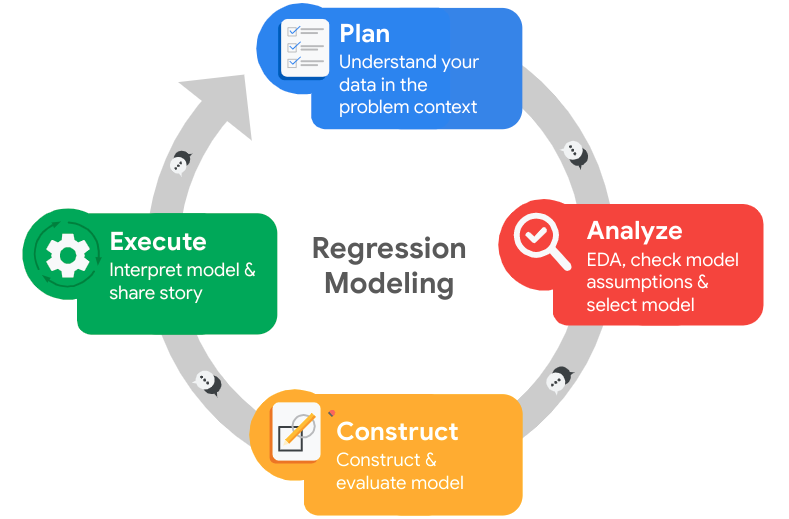

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Notes:

- Stakeholder is the HR department of Salifort Motors.
- The goal is to find the factors that led to employees leaving the company and to build a model than can predict such outcome.
- My intial observation based on what the data contains is that the data contains 2 variables that are nonnumerical values while the rest have numeric values. Without further investigation, data contains at least 3 categorical variables.
- For any ethical considerations, I would need to keep in mind the employees' wellbeing when working with the company.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0.rename(columns = {'number_project':'projects_involved','average_montly_hours':'average_monthly_hours', 
                      'time_spend_company':'years_with_company','Work_accident':'work_accident','left':'left_company',
                      'Department':'department', 'salary':'salary_level'}, inplace=True)

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'projects_involved',
       'average_monthly_hours', 'years_with_company', 'work_accident',
       'left_company', 'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

In [7]:
df0.head()

,satisfaction_level,last_evaluation,projects_involved,average_monthly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
projects_involved        0
average_monthly_hours    0
years_with_company       0
work_accident            0
left_company             0
promotion_last_5years    0
department               0
salary_level             0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
mask = df0.duplicated()
duplicate = df0[mask == True]
duplicate

,satisfaction_level,last_evaluation,projects_involved,average_monthly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary_level
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
new_df0 = df0.drop_duplicates()

new_df0.head()

,satisfaction_level,last_evaluation,projects_involved,average_monthly_hours,years_with_company,work_accident,left_company,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
new_df0.duplicated().sum()

0

In [13]:
new_df0.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

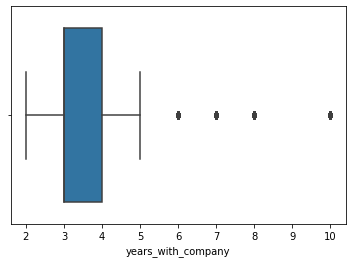

In [14]:
sns.boxplot(data=new_df0, x=new_df0['years_with_company'])

In [15]:
# Determine the number of rows containing outliers
percentile_25 = new_df0['years_with_company'].quantile(0.25)
percentile_75 = new_df0['years_with_company'].quantile(0.75)

iqr = percentile_75-percentile_25

upper_limit = percentile_75 + (iqr*1.5)
lower_limit = percentile_25 - (iqr*1.5)

print('Lower limit: ' + f'{lower_limit}')
print('Upper limit: ' + f'{upper_limit}')

outlier =new_df0[(new_df0['years_with_company'] > upper_limit) | (new_df0['years_with_company'] < lower_limit)]
print('Total Rows:', len(new_df0))
print('Number of outliers:', len(outlier))

Lower limit: 1.5
Upper limit: 5.5
Total Rows: 11991
Number of outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Notes:

- Some variables have positive correlation with each other and two have a negative correlation with each other.
- Some data are normal distributed (some are left-skewed).
- In order to build a model, some variables needed to be converted into categorical variables (1 or 0).
- EDA allows users to understand the variables they are working with and being able to transform them so that any machine learning model can use it.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
left = new_df0[new_df0['left_company']==1].shape[0]
stay = new_df0[new_df0['left_company']==0].shape[0]

# Get percentages of people who left vs. stayed
left_percent = left/new_df0.shape[0]*100
stay_percent = stay/new_df0.shape[0]*100

print('Left: ' + f'{left} people')
print('Percentage: ' + f'{left_percent}')
print('Stayed: '+ f'{stay} people')
print('Percentage: ' + f'{stay_percent}')

Left: 1991 people
Percentage: 16.604119756484028
Stayed: 10000 people
Percentage: 83.39588024351598


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

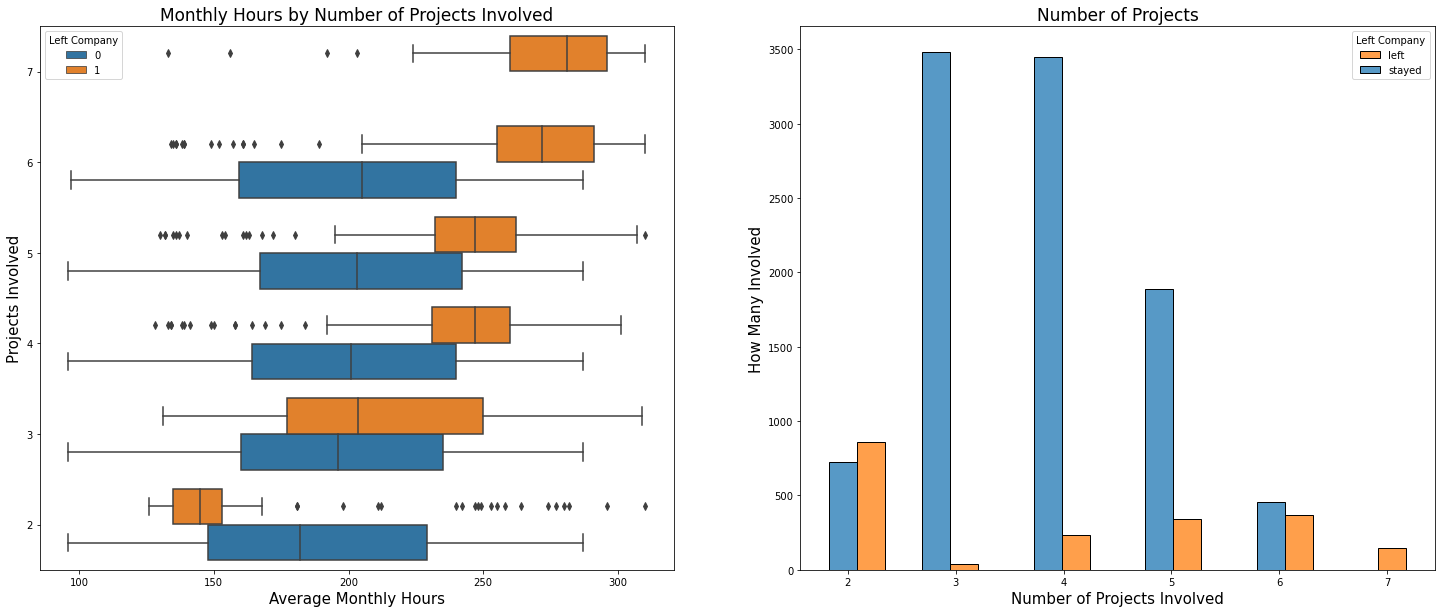

In [17]:
#Comparing average working hours with number of projects

fig, ax = plt.subplots(1,2, figsize=(25,10))

sns.boxplot(data=new_df0, x='average_monthly_hours', y='projects_involved', hue='left_company',orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].legend(title = 'Left Company')
ax[0].set_xlabel('Average Monthly Hours', fontsize=15)
ax[0].set_ylabel('Projects Involved', fontsize=15)
ax[0].set_title('Monthly Hours by Number of Projects Involved', fontsize=17)

stayed = new_df0[new_df0['left_company']==0]['projects_involved']
left = new_df0[new_df0['left_company']==1]['projects_involved']
sns.histplot(data=new_df0, x='projects_involved', hue='left_company', multiple='dodge', shrink=3, ax=ax[1])
ax[1].legend(title= 'Left Company', labels=['left', 'stayed'])
ax[1].set_xlabel('Number of Projects Involved', fontsize=15)
ax[1].set_ylabel('How Many Involved', fontsize=15)
ax[1].set_title('Number of Projects', fontsize=17)

plt.show()

From the boxplot, it shows that employees who are involved in more projects tend to work more hours. Another thing to note is that those who worked on 7 projects ended up leaving the company. Based on the amount of hours, it can be inferred that the employees may have overworked, which can influence their decision to quit on their own.

From the histogram, it shows that those who worked on 3 or 4 projects have a lower amount of employees who left the company. The company can try to restrict employees from working more than 4 projects in order improve their wellbeing.

An interesting note is that in the group of employees who worked on 2 projects, there are more people who left than those who stayed. Because the boxplot shows that they worked fewer hours than their coworkers, a possible explanation is that the company fired them.

In [18]:
#Finding out how many employees who worked on 7 projects left
mask_left = new_df0['projects_involved']
new_df0[mask_left == 7]['left_company'].value_counts()

1    145
Name: left_company, dtype: int64

With a standard working hours (40 hours per week) from Monday-Friday, an average employee would work (50 wk * 40  hrs/wk /12 months) = ~166.67 hours per month. This number will be used to show how many employees underworked, overworked, or worked on average in the following visual.

Text(0.5, 1.0, 'Monthly Hours by Satisfaction Level')

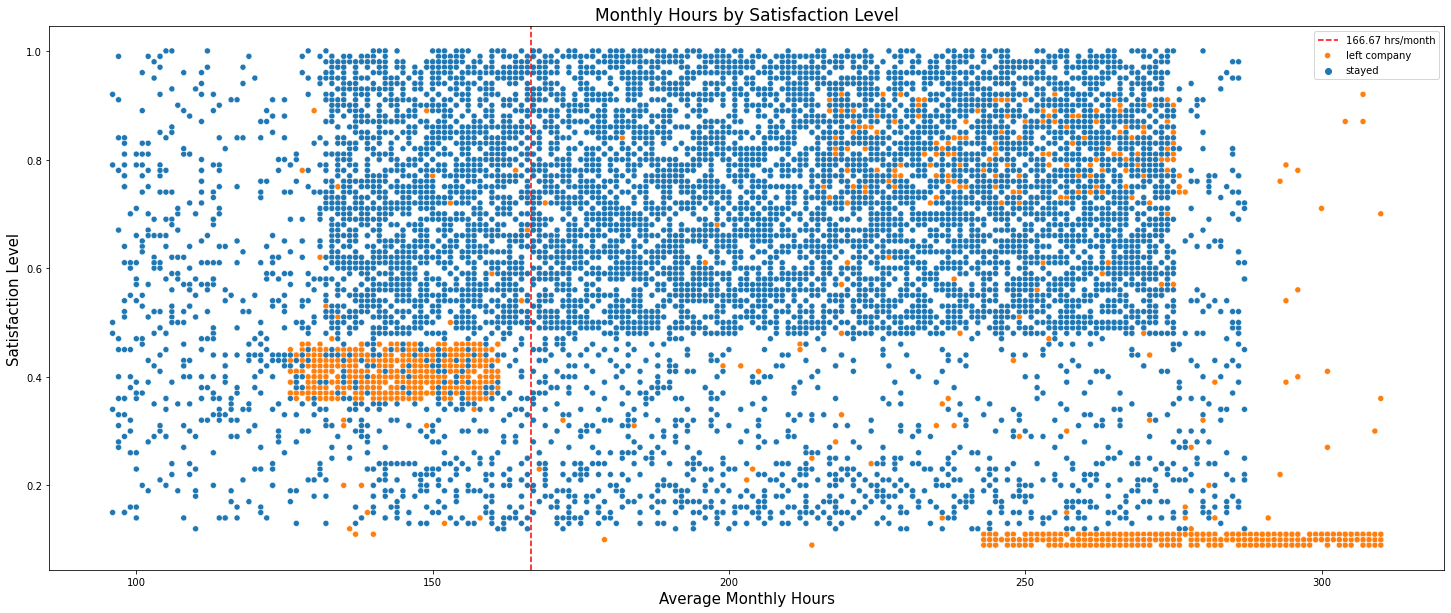

In [19]:
#Comparing employees' satisfaction level to their averae working hours per month

plt.figure(figsize=(25,10))
sns.scatterplot(data=new_df0,x='average_monthly_hours', y='satisfaction_level', hue='left_company')
plt.axvline(x=166.67,color = 'red', ls='--')
plt.legend(labels=['166.67 hrs/month', 'left company', 'stayed'])
plt.xlabel('Average Monthly Hours', fontsize=15)
plt.ylabel('Satisfaction Level', fontsize=15)
plt.title('Monthly Hours by Satisfaction Level', fontsize=17)

In [20]:
new_df0[new_df0['satisfaction_level']>=0.5]['left_company'].value_counts()

0    8228
1     579
Name: left_company, dtype: int64

In [21]:
new_df0[new_df0['satisfaction_level']<0.5]['left_company'].value_counts()

0    1772
1    1412
Name: left_company, dtype: int64

In [22]:
new_df0[new_df0['average_monthly_hours']>=166.67]['left_company'].value_counts()

0    7171
1    1107
Name: left_company, dtype: int64

In [23]:
new_df0[new_df0['average_monthly_hours']<166.67]['left_company'].value_counts()

0    2829
1     884
Name: left_company, dtype: int64

1,412 employees left the company with satisfaction score less than 0.5.
1,107 emplooyess left the company while working more than the average employee.

To minimize the amount of employees leaving the company, the company should consider implementing a policy that helps employees not overworked or be compensated for working overtime. It can also provided additional benefits such as more holiday pay or PTO to improve satisfaction scores.

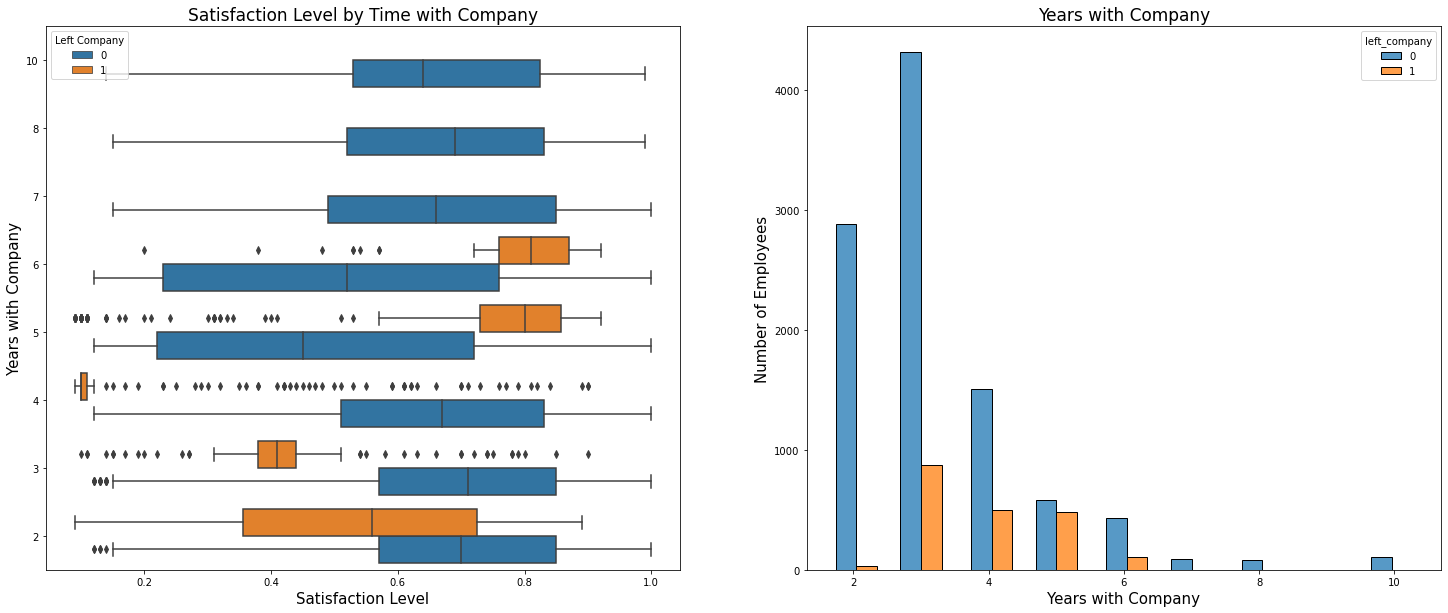

In [24]:
#Creating visuals comparing satisfaction level and time spent with company

fig, ax = plt.subplots(1,2, figsize=(25,10))

sns.boxplot(data=new_df0, x='satisfaction_level', y='years_with_company', hue='left_company', orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].legend(loc='upper left', title = 'Left Company')
ax[0].set_xlabel('Satisfaction Level', fontsize=15)
ax[0].set_ylabel('Years with Company', fontsize=15)
ax[0].set_title('Satisfaction Level by Time with Company', fontsize=17)

remain2 = new_df0[new_df0['left_company']==0]['years_with_company']
leave2 = new_df0[new_df0['left_company']==1]['years_with_company']
sns.histplot(data=new_df0, x='years_with_company', hue='left_company',multiple='dodge',shrink =7, ax=ax[1])
ax[1].set_xlabel('Years with Company', fontsize=15)
ax[1].set_ylabel('Number of Employees', fontsize=15)
ax[1].set_title('Years with Company', fontsize=17)

plt.show()

The company should investigate the possible reason(s) for the low satisfaction level from employees who worked for 4 years.

In [25]:
#Calculating the mean satisfaction score for those who stayed and those who left
new_df0.groupby('left_company')['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left_company,,
0,0.667365,0.69
1,0.440271,0.41


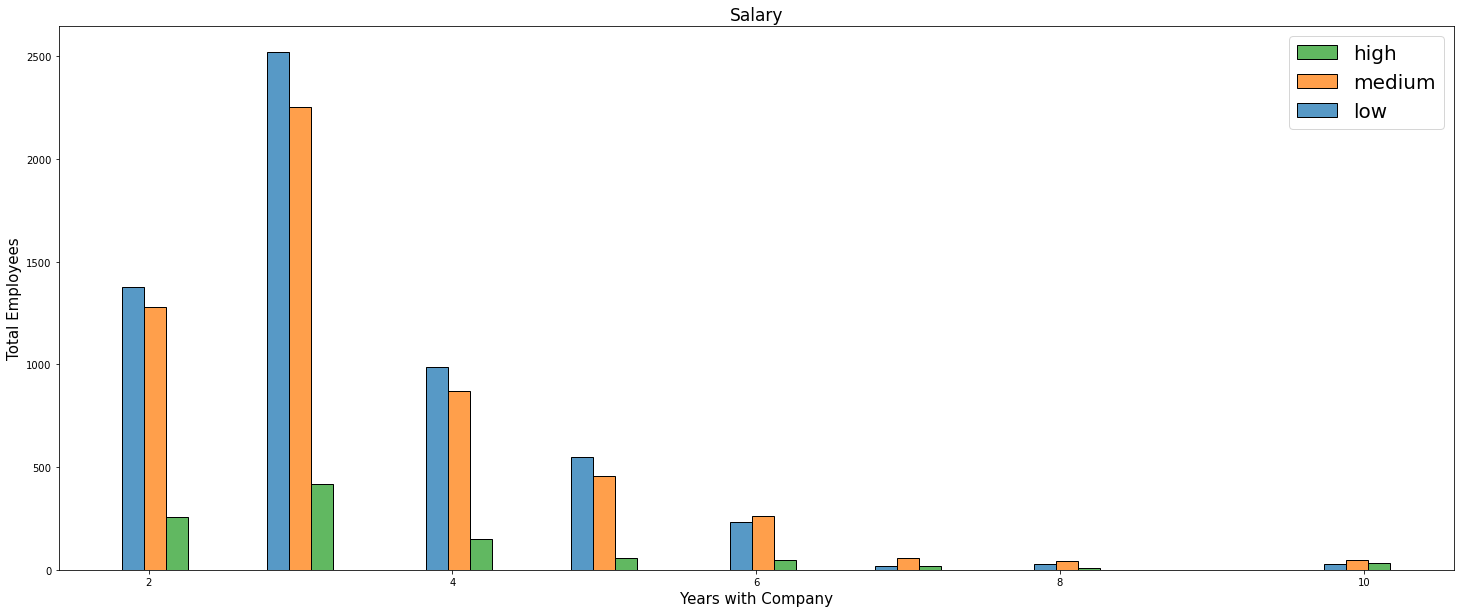

In [26]:
#Taking a look at number of employees based on years spent with company and their salary level
plt.figure(figsize=(25,10))

sns.histplot(data=new_df0, x='years_with_company', hue='salary_level',shrink =5,multiple='dodge')
plt.xlabel('Years with Company', fontsize=15)
plt.ylabel('Total Employees', fontsize=15)
plt.title('Salary', fontsize=17)
plt.legend(fontsize=20, labels=['high', 'medium', 'low'])
plt.show()

Text(0.5, 1.0, 'Monthly Hours by Last Evaluation Score')

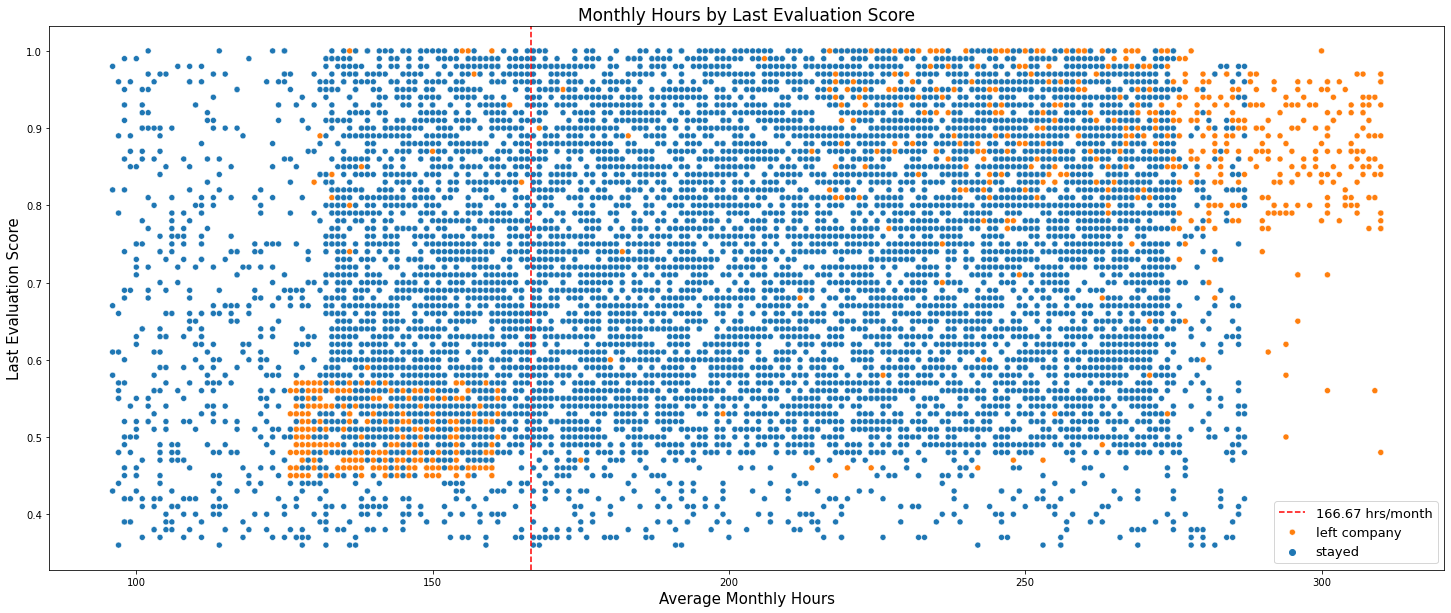

In [27]:
#Comparing monthly hours with last evaluation score

plt.figure(figsize=(25,10))
sns.scatterplot(data=new_df0,x='average_monthly_hours', y='last_evaluation', hue='left_company')
plt.axvline(x=166.67,color = 'red', ls='--')
plt.xlabel('Average Monthly Hours', fontsize=15)
plt.ylabel('Last Evaluation Score', fontsize=15)
plt.legend(labels=['166.67 hrs/month', 'left company', 'stayed'], fontsize=13)
plt.title('Monthly Hours by Last Evaluation Score', fontsize=17)

In [28]:
new_df0[(new_df0['average_monthly_hours']>166.67) & (new_df0['last_evaluation']>=0.7)]['left_company'].value_counts()

0    3980
1    1051
Name: left_company, dtype: int64

In [29]:
new_df0[(new_df0['average_monthly_hours']<166.67) & (new_df0['last_evaluation']<0.7)]['left_company'].value_counts()

0    1468
1     848
Name: left_company, dtype: int64

Even though they received a high evaluation score at or above 0.7, these 1,051 employees still left the company. Based on the visual, the same employees are also those who worked more hours than average. This can be strong indicator that their monthly hours worked influence their decision to leave the company.

Text(0.5, 1.0, 'Monthly hours by Promotion')

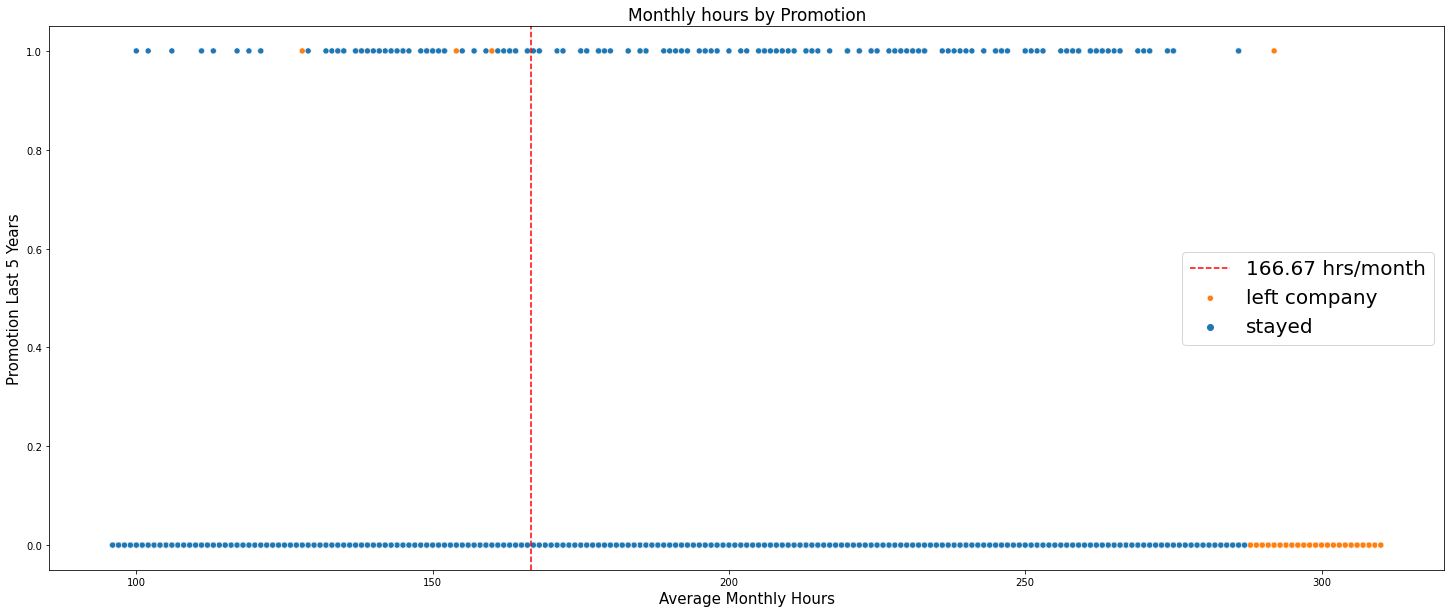

In [30]:
# Comparing monthly hours with promotions

plt.figure(figsize=(25,10))
sns.scatterplot(data=new_df0,x='average_monthly_hours', y='promotion_last_5years', hue='left_company')
plt.axvline(x=166.67,color = 'red', ls='--')
plt.xlabel('Average Monthly Hours', fontsize=15)
plt.ylabel('Promotion Last 5 Years', fontsize=15)
plt.legend(labels=['166.67 hrs/month', 'left company', 'stayed'], loc='center right',fontsize=20)
plt.title('Monthly hours by Promotion', fontsize=17)

Many employees who left have worked more than average per month but was never promoted. This can affect employees satisfaction level. To resolve it, companies should consider promoting those who have done a good job in their role while working more than their coworkers.

In [31]:
new_df0['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

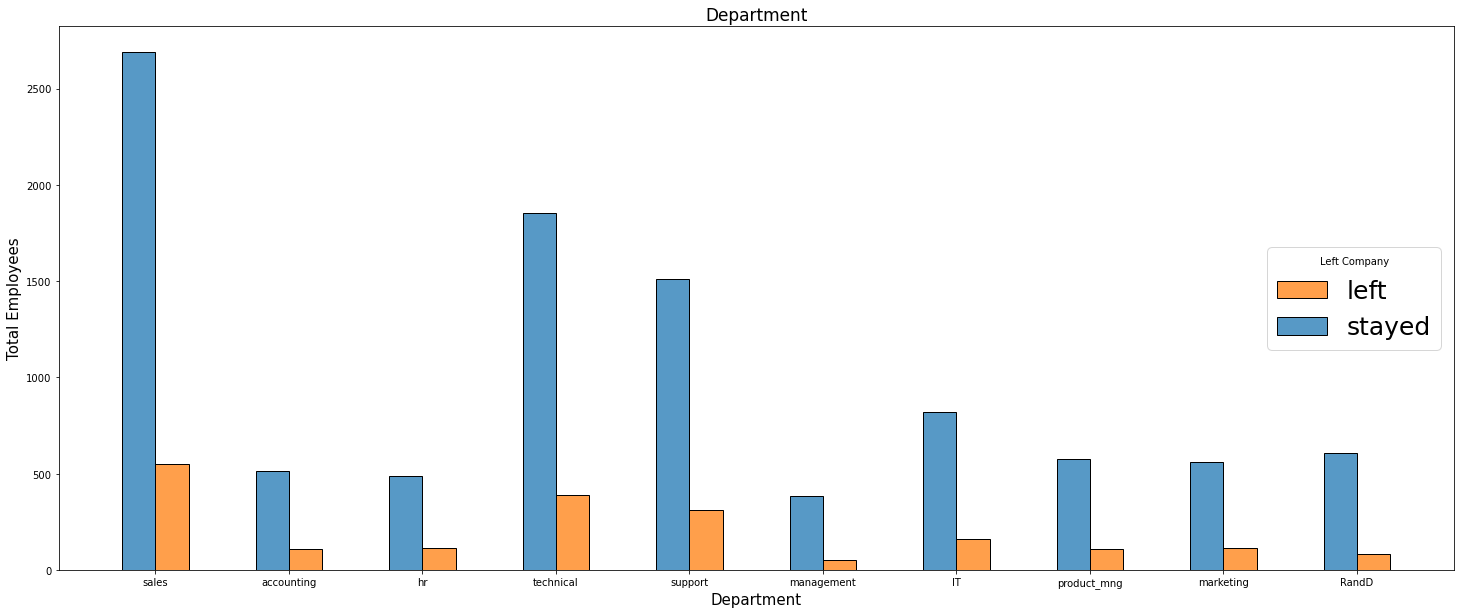

In [32]:
#Visualizing how many employees left based on their department

plt.figure(figsize=(25,10))

sns.histplot(data=new_df0, x='department', hue='left_company',multiple='dodge', shrink=.5)
plt.xlabel('Department', fontsize=15)
plt.ylabel('Total Employees', fontsize=15)
plt.title('Department', fontsize=17)
plt.legend(title='Left Company', labels=['left','stayed'], loc='center right', fontsize=25)

plt.show()

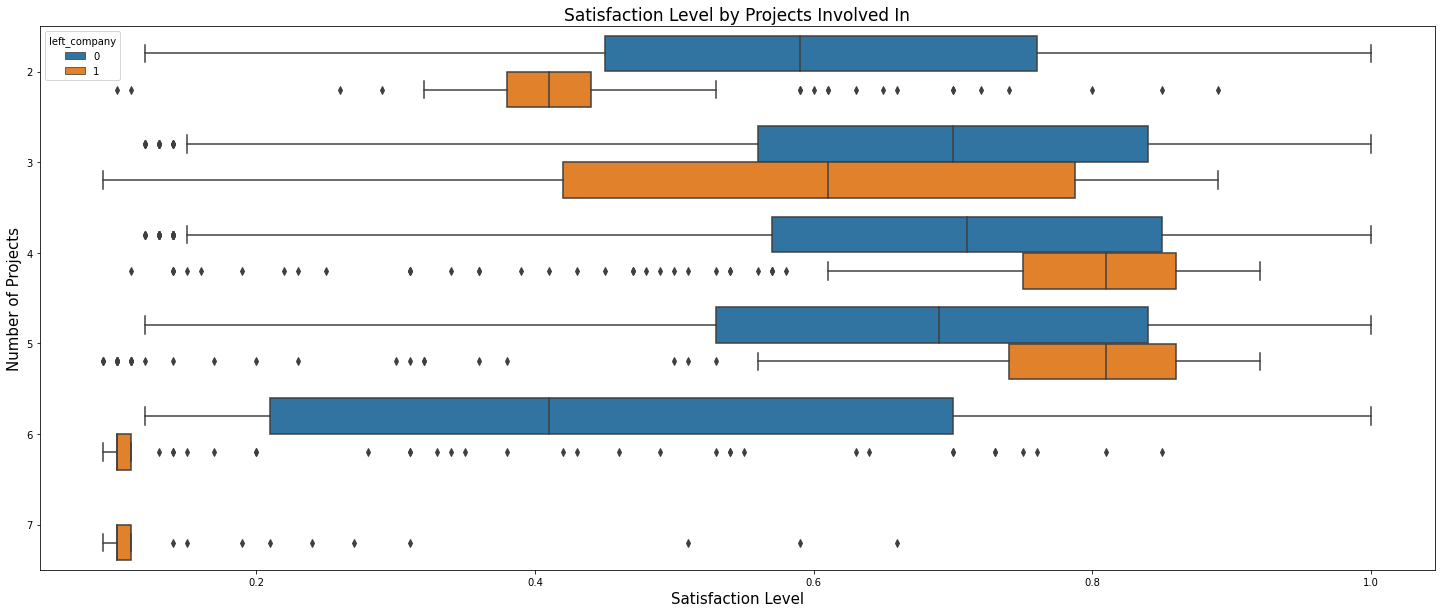

In [34]:
#Checking employees satisfaction level based on number of projects they worked on 

plt.figure(figsize=(25,10))

sns.boxplot(data=new_df0, x='satisfaction_level', y='projects_involved', hue='left_company',orient='h')
plt.title('Satisfaction Level by Projects Involved In', fontsize=17)
plt.xlabel('Satisfaction Level', fontsize=15)
plt.ylabel('Number of Projects', fontsize=15)
plt.show()

It shows that all employees who worked on 7 projects have left with an unsatisfying scores. This further supports that it would be ideal to have employees not worked on 7 projects in order to not have them feel overworked and decide to leave their role.

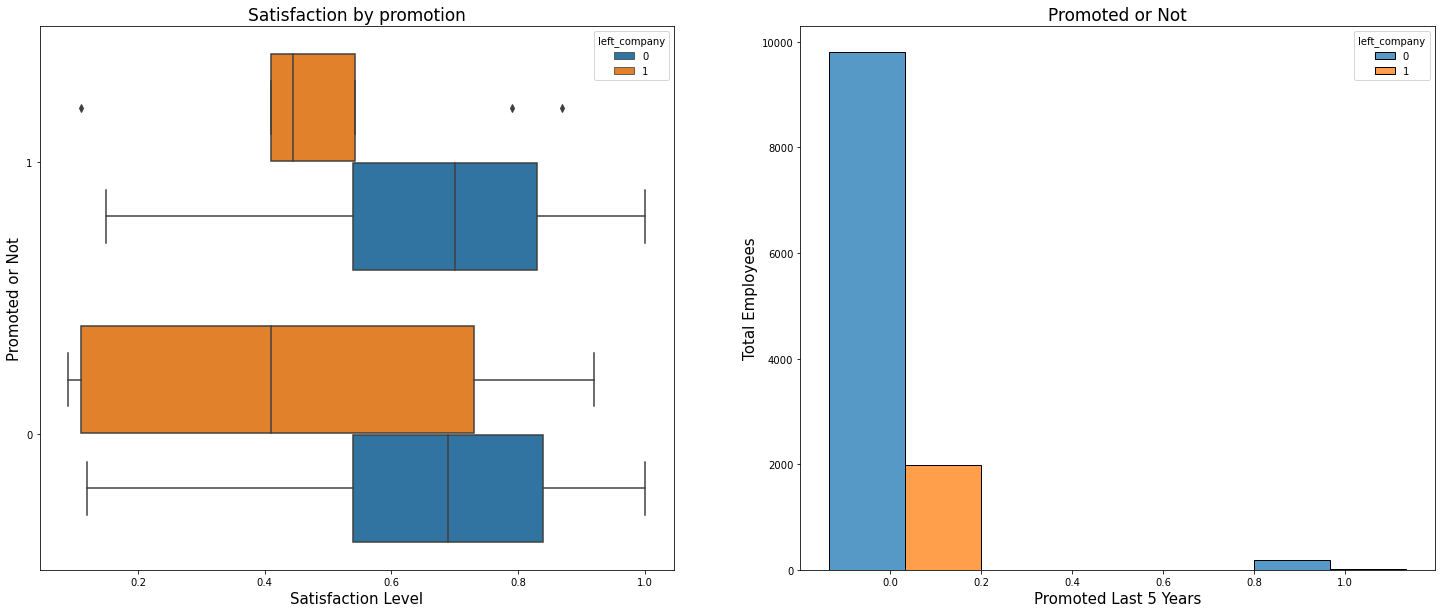

In [35]:
#Comparing employees'satisfaction level based on whether they were promoted or not in the last 5 years
fig, ax = plt.subplots(1,2, figsize=(25,10))

sns.boxplot(data=new_df0, x='satisfaction_level', y='promotion_last_5years', hue='left_company',orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Satisfaction Level', fontsize=15)
ax[0].set_ylabel('Promoted or Not', fontsize=15)
ax[0].set_title('Satisfaction by promotion', fontsize=17)

sns.histplot(data=new_df0, x='promotion_last_5years', hue='left_company',multiple='dodge',shrink =5, ax=ax[1])
ax[1].set_xlabel('Promoted Last 5 Years', fontsize=15)
ax[1].set_ylabel('Total Employees', fontsize=15)
ax[1].set_title('Promoted or Not', fontsize=17)

plt.show()

Here, majority of those who left have a low satisfaction score while not receiving promotion. As a solution, the company should consider promoting employees who have worked hard while doing an excellent job in their role.

Text(0.5, 1.0, 'projects vs promotions')

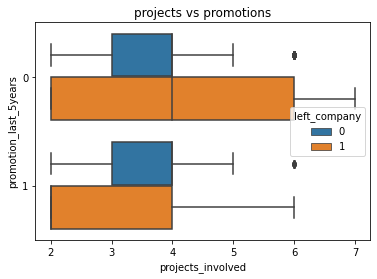

In [36]:
sns.boxplot(data=new_df0, x='projects_involved', y='promotion_last_5years', hue='left_company',orient='h')
plt.title('projects vs promotions')

Comparing the two groups (those promoted and those not promoted), the non-promoted group has more former employees who worked on more than 4 projects. It can mean that these employees may not feel rewarded for putting in the extra effort for the company than their coworkers.

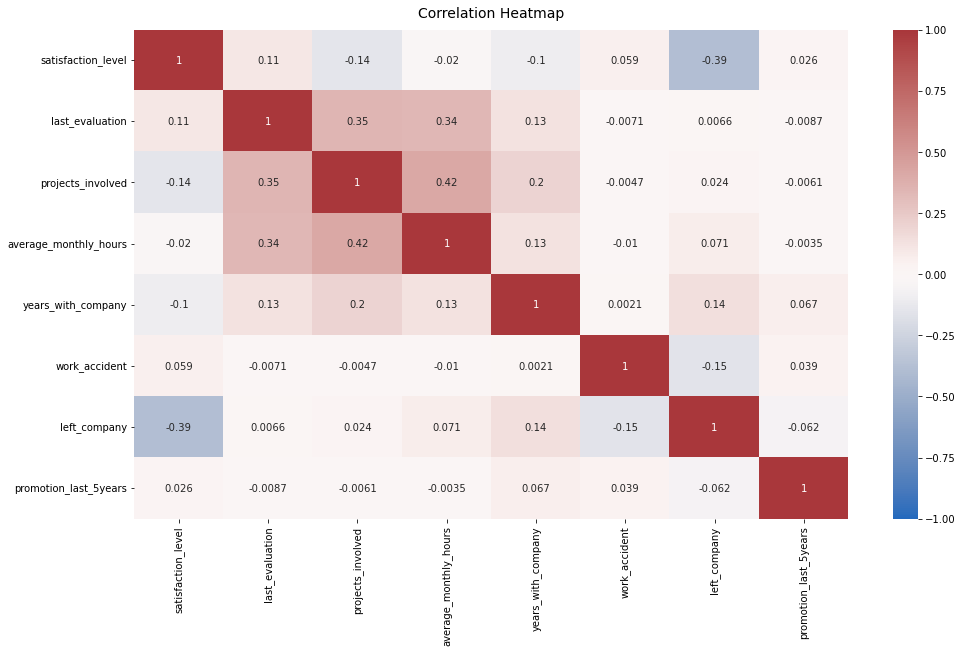

In [33]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Based on the heat map, there are positive correlation between last_evaluation, projects_involved, and average_monthly_hours. There is a negative correlation with satisfaction level and whether employees leave or not.

### Insights

The factors to the high amount of employees leaving the company are the amount of hours worked per month, number of projects they were involved in, and whether they were promoted or not. Overall, these are the results of the company's poor management.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Notes:

- Set left_company as the dependent variable and the rest as independent variable since they will determine the employees' decision of leaving the company or not.
- Model assumptions are met.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predict whether an employee leaves or not -- this will be the categorical variable (left_company). In this case, the values will be either 1 or 0 where 1 indicates employee left and 0 indicates employee did not leave.

### Identify the types of models most appropriate for this task.

We can build a logistic model.

(Note: a random tree model can also work)

### Modeling

Add as many cells as you need to conduct the modeling process.

In [37]:
#Converting salary level into a numeric category variable so that logistric regression can run
dfcode = new_df0.copy()

dfcode['salary_level'] = (dfcode['salary_level'].astype('category').cat.set_categories(['low','medium', 'high'])
                          .cat.codes)

#Applying dummy variables for the department variable
dfcode =pd.get_dummies(dfcode, drop_first=False)

dfcode.head()

,satisfaction_level,last_evaluation,projects_involved,average_monthly_hours,years_with_company,work_accident,left_company,promotion_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


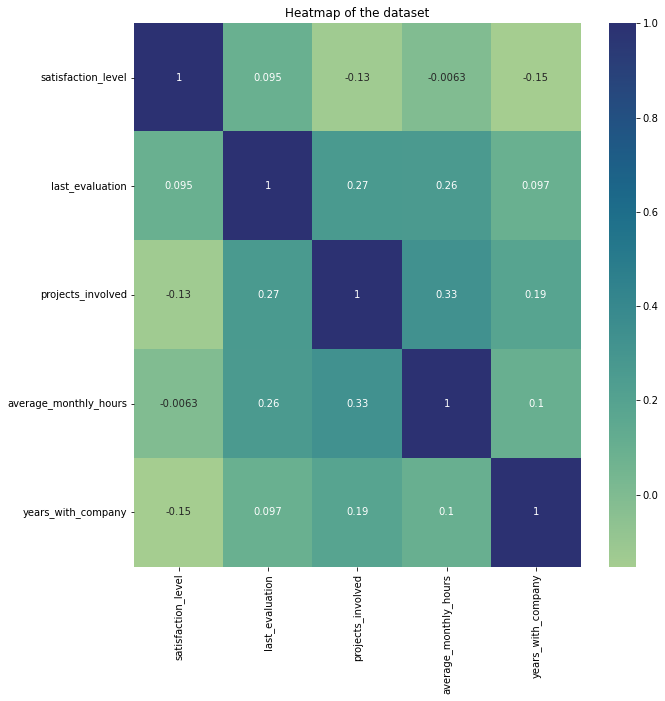

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(dfcode[['satisfaction_level', 'last_evaluation', 'projects_involved', 'average_monthly_hours', 'years_with_company']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [39]:
#Eliminating outliers as logistic regression requires no outliers
dflog = dfcode[(dfcode['years_with_company']>=lower_limit) & (dfcode['years_with_company']<=upper_limit)]

dflog.head()

,satisfaction_level,last_evaluation,projects_involved,average_monthly_hours,years_with_company,work_accident,left_company,promotion_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
y=dflog['left_company']
X= dflog.drop('left_company', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [41]:
clf = LogisticRegression(random_state=42,max_iter=500).fit(X_train,y_train)

In [42]:
y_pred=clf.predict(X_test)

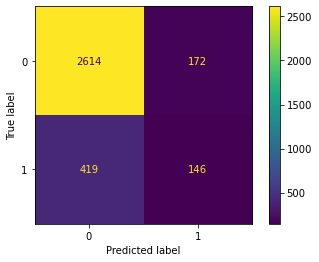

In [43]:
cm = confusion_matrix(y_test,y_pred,labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot(values_format='')

plt.show()

In [44]:
dflog['left_company'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left_company, dtype: float64

In [45]:
outcome = ['Predcited to not leave', 'Predicted to leave']
print(classification_report(y_test,y_pred, target_names=outcome))

                        precision    recall  f1-score   support

Predcited to not leave       0.86      0.94      0.90      2786
    Predicted to leave       0.46      0.26      0.33       565

              accuracy                           0.82      3351
             macro avg       0.66      0.60      0.61      3351
          weighted avg       0.79      0.82      0.80      3351



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Notes:

- I recommend the business to update its work policies so that employees do not need to overwork while not working on 6-7 projects. The company should also promote more to those who have done an excellent job in their role.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

According to the report, the model has a precision score of 0.79, recall score of 0.82, f1 score of 0.80, and accuracy score of 0.82.

### Conclusion, Recommendations, Next Steps

Improve the company policy so that employees are not overworking or compensate them for working longer than average. The company can also consider promoting those who have worked on many projects and worked more than everage. Control the amount of projects employees can work on. It should also provide additional benefits to improve the satisfaction levels.

In case employees are not aware of the changes, the compnay should make sure to address the changes and provide the resources for the employees.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.